# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*

    
___



# End-to-End Machine Learning Project!


TASKS TO DO:

1/ Describe the Task

2/ Get the data

3/ Discover and Visualize the Data to Gain Insights!

4/ Prepare the Data for ML Algorithms!

5/ Select and Train a Model

6/ Fine-Tune the Model!

___    

# 1/ The Problem 

**Objective**: 
   
   Build a model of housing prices in California using the California census data to be able to predict the median housing price in any district. 
    
**Problem**: 

    * multivariate regression (will use multiple features to make a prediction); 
    * there is no continuous flow of data -> batch learning; 


# Setup environment

First, let's make sure this notebook works well in with Python 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)


# SET PATH TO YOUR PROJECT DIRECTORY!!!
PROJECT_DIR = "./" 
if os.path.isdir(os.path.join(PROJECT_DIR)): 
    print('Ok continue.')
else: 
    print('Nok, set correct path to your project directory!')


Ok continue.


In [9]:
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv("/Users/dbcooper/Downloads/mlgeo/03_ml_project/housing/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.shape

(20640, 10)

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(array([1796., 8987.,  747.,  474., 1292., 4712., 1740.,  490.,  324.,
          78.]),
 array([32.54 , 33.481, 34.422, 35.363, 36.304, 37.245, 38.186, 39.127,
        40.068, 41.009, 41.95 ]),
 <BarContainer object of 10 artists>)

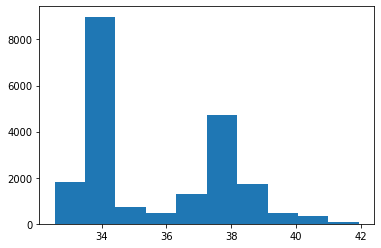

In [11]:
plt.hist(data.latitude)

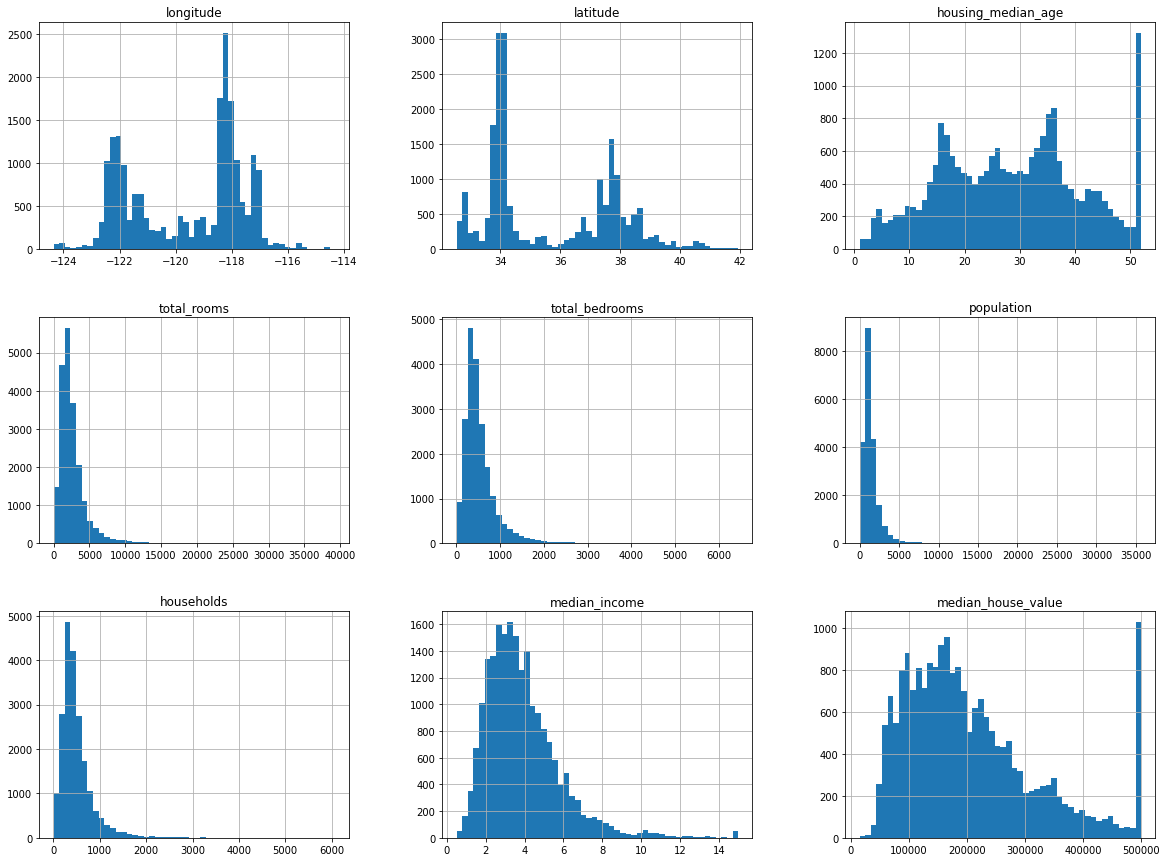

In [20]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# 2/ Get the data

    2.1/ load the data 
    2.2/ 
    2.3/ Take a Quick Look at the Data Structure!
    2.4/ Create a Test Set!!! (Sampling) 

In [ ]:
print(PROJECT_DIR)

In [ ]:
# load data 
pass

In [ ]:
# check header and some values 
pass

In [ ]:
# evaluate the values 
pass

In [ ]:
# describe the data set (count, mean ... max)
# ... .describe()
pass

In [ ]:
# check the histograms of all variables (where possible) 
pass

In [18]:
data.dtypes
data.isnull().values.any()
# ready to use the data?
# are all data continuous numeric? 
# are there missing values?

True

In [68]:

na_rows= data[data.isnull().any(axis=1)].head()
na_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [69]:
#na_rows.dropna(subset=["total_bedrooms"])

median = data["total_bedrooms"].median()
na_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
na_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [70]:
data[data.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [71]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median", missing_values=np.NaN)

In [77]:
data.drop("ocean_proximity", inplace=True, axis=1)

KeyError: "['ocean_proximity'] not found in axis"

In [78]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [79]:
# Now you can use this “trained” imputer to transform the training set
# by replacing missing values by the learned medians
data_imputed = pd.DataFrame(imputer.fit_transform(data))

In [80]:
data_imputed.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## 2.4./ Create a Test Set

train_set, test_set

In [24]:
from sklearn.model_selection import train_test_split
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set
test_set
# train_set, test_set 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12833,-121.41,38.69,28.0,1601.0,308.0,848.0,305.0,3.6429,105200.0,INLAND
18155,-122.06,37.35,31.0,1795.0,281.0,872.0,282.0,8.0599,381800.0,<1H OCEAN
6640,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,162500.0,<1H OCEAN
8799,-118.37,33.77,26.0,6339.0,876.0,2540.0,880.0,10.1447,500001.0,NEAR OCEAN
12964,-121.31,38.71,18.0,3998.0,744.0,2071.0,660.0,4.3836,102000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
4196,-118.23,34.11,35.0,4148.0,971.0,3220.0,892.0,3.3389,187100.0,<1H OCEAN
16763,-122.49,37.67,29.0,3795.0,675.0,2494.0,696.0,5.2848,260300.0,NEAR OCEAN
12662,-121.42,38.50,24.0,7740.0,1539.0,4333.0,1397.0,3.0250,87900.0,INLAND
20135,-119.06,34.38,33.0,1465.0,262.0,731.0,266.0,3.9464,230300.0,<1H OCEAN


In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set, test_set
# check the df

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 14196    -117.03     32.71                33.0       3126.0           627.0   
 8267     -118.16     33.77                49.0       3382.0           787.0   
 17445    -120.48     34.66                 4.0       1897.0           331.0   
 14265    -117.11     32.69                36.0       1421.0           367.0   
 2271     -119.80     36.78                43.0       2382.0           431.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -117.96     33.78                35.0       1330.0           201.0   
 11964    -117.43     34.02                33.0       3084.0           570.0   
 5390     -118.38     34.03                36.0       2101.0           569.0   
 860      -121.96     37.58                15.0       3575.0           597.0   
 15795    -122.42     37.77                52.0       4226.0          1315.0   
 
        population  households  median

In [54]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

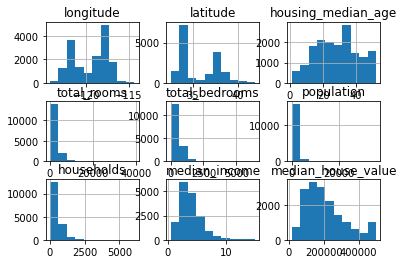

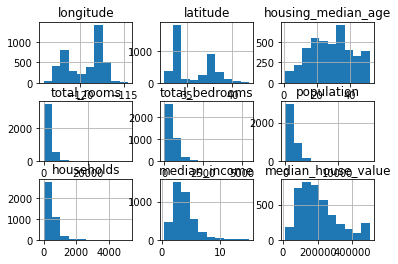

In [31]:
train_set.hist()
test_set.hist()# Check the histogram  of both train and test sets
pass

In [55]:
#Stratifying

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [46]:
col_names=list(data.columns.values)
col_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [58]:
# Case of cathegorical lables in y
attributes_sel = col_names
X = np.array(data[attributes_sel])
Y = np.array((data['longitude'] > 0) * 1)
X

array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 1.7, 92300.0, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 1.8672, 84700.0, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 2.3886, 89400.0, 'INLAND']],
      dtype=object)

In [61]:
X.shape, Y.shape

((20640, 10), (20640,))

### Stratified sampling?

    - Most median income values are clustered around 2–5; 
    - some median incomes go far beyond 6; 
    - should not have too many strata, and each stratum should be large enough; 
    - create an income category attribute by dividing the median income by 1.5 (rounding up using ceil);
    - merging all the categories greater than 5 into category 5. 
    

In [62]:
# Divide by 1.5 to limit the number of income categories
# ... np.ceil(housing["median_income"] / 1.5)
pass

In [ ]:
len(data.index)


<AxesSubplot:>

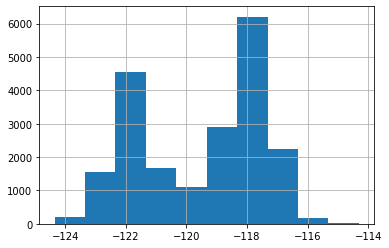

In [64]:
data['longitude'].hist()

In [ ]:
# check the categories in df

In [ ]:
# plot histogram of the categories!pass

In [ ]:
# Do stratified sampling based on the income category!
# use Scikit-Learn’s  StratifiedShuffleSplit
pass

# train_index, test_index 

In [ ]:
# check the income category proportions in the test set
pass

In [ ]:
# the income category proportions in the full housing dataset
pass

In [ ]:
# Is there a balnce?

In [ ]:
# Compare stratified sampling, and using purely random sampling!
# of the income category proportions generated 
pass 

In [ ]:
# Which one do you prefere? 

In [ ]:
# cleaning, if necessary 
pass

# 3/ Discover and visualize the data to gain insights

    3.1/ Visualize Geographical data
    3.2/ Look for Correlations
    3.3/ Experiment with Attribute Combinations


In [81]:
# Common imports
import numpy as np
import os

# add more based on the topic of the lab

# to make this notebook's output stable across runs
np.random.seed(42)

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# path to the current lab directory - set individually!!!
# TODO HERE!
PROJECT_DIR = "./"
if os.path.isdir(PROJECT_DIR):
    print('Ok continue.')
else:
    print('Nok, set correct path to your project directory!')


Ok continue.


In [88]:
# suggested: create a copy of the whole data set for experimenting
data_copy=data
data_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


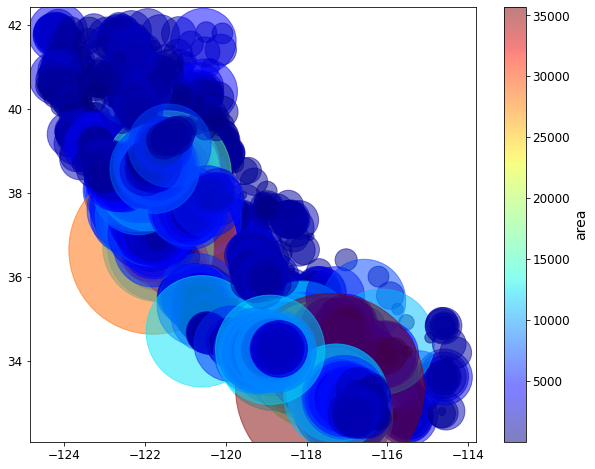

In [89]:
# plot housing data
plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(data_copy['longitude'], data_copy['latitude'],
            c=data_copy['population'], s=data_copy['population'],
            cmap="jet", alpha=0.5)

plt.colorbar(label="area")
plt.show()

In [91]:
# looking for correlations

corr_matrix = data_copy.corr()

In [96]:
import seaborn as sns
correlation = data_copy.corr(method='pearson')
correlation["population"].sort_values(ascending=False)
correlation.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
# create correlation matrix and sort it
pass

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='population'>,
        <AxesSubplot:xlabel='latitude', ylabel='population'>,
        <AxesSubplot:xlabel='population', ylabel='population'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='population'>],
       [<AxesSubplot:xlabel='longitude', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='latitude', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='population', ylabel='housing_median_age'>,
        <Axes

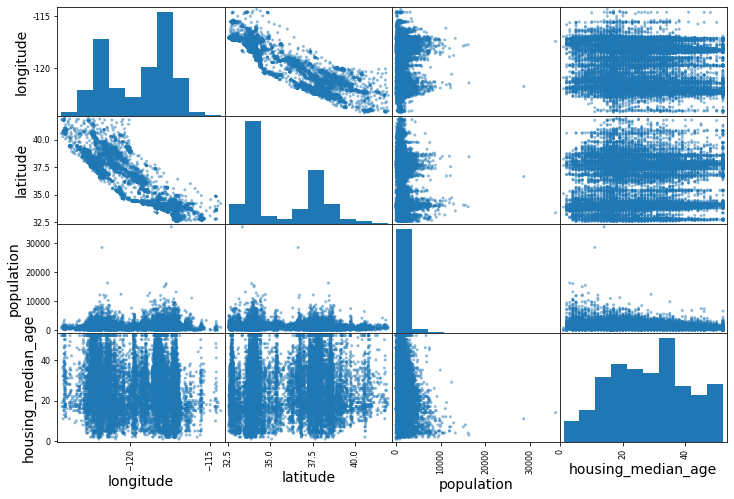

In [97]:
# plot the scatterplot of the features combinations
# old: from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["longitude", "latitude", "population",
              "housing_median_age"]
scatter_matrix(data_copy[attributes], figsize=(12, 8), alpha=0.5)

<AxesSubplot:xlabel='population', ylabel='housing_median_age'>

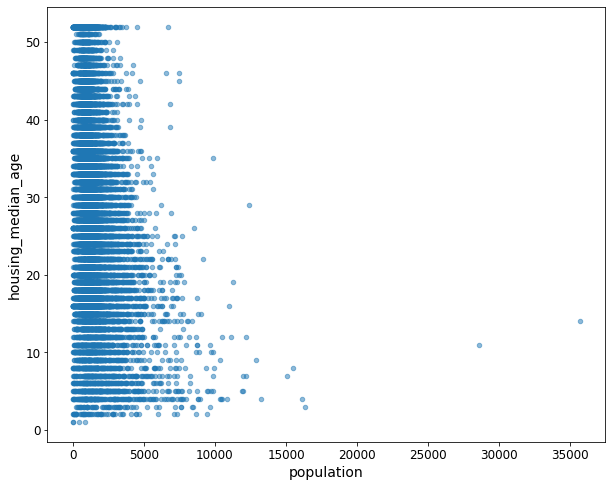

In [98]:
data_copy.plot(kind="scatter", x="population", y="housing_median_age", alpha=0.5)
# any dependent features? ... good predictors

In [ ]:
# add some more features (relative) 

# rooms_per_household
# bedrooms_per_rooms
# population_per_household 
pass

In [ ]:
# create correlation matrix with the extended feature space
pass

In [ ]:
# describe the extended data set
pass

# 4/ Prepare the data for Machine Learning algorithms

    4.1/ Clean the data
    4.2/ Transform the features


In [ ]:
# drop labels for training set => X
pass
# create object of labels - median_house_value => y 
pass

In [ ]:
# which record(s) have None / null?
pass
# create a objcet of incomplete rows
pass 

In [ ]:
# fill-in reasonable value for the missing record (imputing) or remove the records 
pass 

In [ ]:
# ...

In [ ]:
# check manually the imputed values (if applicable) 

### Transform the data

In [ ]:
# define function for adding extra features 
pass 

In [ ]:
# treat cathegorical variables 
# use OrdinalEncoder and/or OneHotEncoder() where appropirate 
pass

# Select and train a model

In [99]:
# Common imports
import numpy as np
import os

# add more based on the topic of the lab

# to make this notebook's output stable across runs
np.random.seed(42)

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# path to the current lab directory - set individually!!!
# TODO HERE!
PROJECT_DIR = "./"
if os.path.isdir(PROJECT_DIR):
    print('Ok continue.')
else:
    print('Nok, set correct path to your project directory!')

Ok continue.


In [103]:
# check your prepared data set
df=pd.DataFrame(data)
df.shape

(20640, 9)

In [106]:
# random split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df
                                       , test_size=0.3, random_state=42)
type(train_set), train_set.shape, test_set.shape

(pandas.core.frame.DataFrame, (14448, 9), (6192, 9))

In [129]:
# convert the selected attributes to Numpy ndarray
X_train = np.array(train_set[df.columns.values],
                   dtype=np.float64)
y_train = np.array(train_set[['median_income']].values.ravel(), dtype=np.float64)

In [130]:
X_test = np.array(test_set[test_set.columns.values],
                  dtype=np.float64)
y_test = np.array(test_set[['median_income']].values.ravel(), dtype=np.float64)

In [131]:
# suggestion: try first a linear regression model

from sklearn.linear_model import LinearRegression as LR

model_A=LR().fit(X_train,y_train)

print("Intercept:", model_A.intercept_)
print("coef_B:", model_A.coef_)


Intercept: -5.240252676230739e-14
coef_B: [-4.31007208e-16 -3.04155979e-16 -2.09213684e-16 -1.38785025e-18
 -2.03626886e-17 -2.64168400e-20  3.30765605e-17  1.00000000e+00
  6.86096687e-20]


In [132]:
### assess model performance
from sklearn.model_selection import cross_val_score
# i. scoring itself directly (not recommended, overrates performance)
print('R2 on itself: ', model_A.score(X_train, y_train))
# ii. scoring by a cross-validation
# https://scikit-learn.org/stable/modules/cross_validation.html
scores = cross_val_score(LR(), X_train, y_train, cv=4)
print('R2 by cval: ', scores)

R2 on itself:  1.0
R2 by cval:  [1. 1. 1. 1.]


In [133]:
# use non-linear model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# prediction
income_predictions = tree_reg.predict(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [128]:
# calculate error metrics for the second model

# calculate error metrics
# which is suitable MAE / RMSE?
# the firs model evaluation (RMSE)
from sklearn.metrics import mean_squared_error

LR_mse = mean_squared_error(y_test, income_predictions)
LR_rmse = np.sqrt(LR_mse)
print(round(LR_rmse, 2))

NameError: name 'income_predictions' is not defined

In [ ]:
# how good is the model? 


# Fine-tune the second model

In [ ]:
# use cross_val_score 
pass

In [ ]:
# display the scores 
pass

In [ ]:
# use GridSearchCV to fine tune the hyperparameters 
# BEAWARE it may run long time! 

# prepare the param 
pass 

# instantiate the estimateor
pass 

# instantiate the object for grid search
pass

# fit the models (how many?)
pass 

In [ ]:
# which is the best_estimator_?
pass

In [ ]:
# you may print the results of all the models in grid search
# to understand the models behaviour

In [ ]:
# use RandomizedSearchCV to fine tune the hyperparameters 
# BEAWARE it may run long time! 

pass 

In [ ]:
# which is the best_estimator_?
pass 

In [ ]:
# look at the models behaviour

In [ ]:
# you may calculate feature importances for the best estimtor

In [ ]:
# add the extra atributes you have prepared before and evaluate its contribution to the model
pass

In [ ]:
# select final model and evaluate it with test set!
pass

# calculate final error indicators (MSE and/or RMSE)
pass

# Extra task

not a compulsory

## Create a full pipeline with data preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("modeling", Regression())
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(X_test)

## Model persistence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
from sklearn.externals import joblib

# store the model
joblib.dump(my_model, "my_model.pkl")

# for potential reuse 
my_model_loaded = joblib.load("my_model.pkl")